# A Comparison of MSP Payments in 2010/2011 and 2020/2021 Fiscal Year

Group members:  Jiaying Liao, Alan Wei, Emma Zhang, Jiawei Huang

## Introduction

In Canada, public health insurance is available to eligible residents. Canadian citizens and permanent residents can apply for provincial health insurance. In British Columbia, public health insurance is called Medical Services Plan (MSP). It covers the cost of medically-necessary insured doctor services (Ministry of Health, 2021). There are multiple studies regarding medical service plans around the world, but only a few of them are related to British Columbia MSP and some of the studies are even years old. So we want to fill the research gap with these up-to-date data.

BC Medical Services Plan's (MSP) annual financial statements include a detailed listing of total annual payments to all practitioners and organizations (Compensation Policy and Programs, 2022). 
The data is obtained from the BC government website. The first column “Payments to Practitioners” refers to the names of enrolled medical practitioners. The second column “Amount” refers to the amount of money (in CAD) paid by the MSP program. The third column “Fiscal Year” refers to the year of payments. The dataset covers the payments from 2010-11 to 2020-21 (Compensation Policy and Programs, 2022).

According to data from the BC government website, the total annual payments to all practitioners and organizations in British Columbia may be increased over the study period. This can be factored into increases attributable to changes in the age structure of the population, general population growth and age-specific increases in per-capita use (Barer et al., 1989). Our objective is to compare the BC Medical Services Plan’s  (MSP) annual financial payment in the 2010/2011 and 2020/2021 Fiscal Years. We will use the median value of the total amount in 2010/11 and 2020/21 to make comparisons. In addition, the confidence interval will provide reliability to the estimation of population medians.

## Methods and Results

Before getting started with our data, we run the next code block to load the packages we need.

In [18]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(infer)
library(repr)
library(tidyverse)
library(digest)
library(broom)
library(digest)

Firstly, we read our data using `read_csv()`. To make sure that our data is tidy, we rename two columnn names before filtering out some rows that are summarizing data.

In [19]:
msp_data <- read_csv("data/msp_data.csv") %>%
    rename("Fiscal_Year" = "Fiscal Year", "Payments_to_Practitoners" = "Payments to Practitioners") %>%
    filter(!grepl("Total Expenditures|Out of Province Payments|Reciprocal Agreements Recoveries|Under Threshold", 
             Payments_to_Practitoners, ignore.case = TRUE))
head(msp_data)

Rows: 121282 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Payments to Practitioners, Fiscal Year


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Payments_to_Practitoners,Amount,Fiscal_Year
<chr>,<dbl>,<chr>
"Aartsma, Durk Pieter",265138.74,2020/2021
"Abayomi, Michael Ayotunde",557779.95,2020/2021
"Abbas, Wea'am",95487.34,2020/2021
"Abbey, Mark Douglas",96681.08,2020/2021
"Abbott, Breanne",352280.26,2020/2021
"Abbott, Salome",166357.84,2020/2021


> Table 1: Overview of data

Next, since we are evaluating MSP Payments in 2010/2011 and 2020/2021 Fiscal Year, now we will make two subsets of these two years' data with column `Amount` and `Fiscal_Year` respectively using `filter()` and `select()`.

In [20]:
msp_2010 <- msp_data %>% 
filter(Fiscal_Year == "2010/2011") %>% 
select(Amount, Fiscal_Year) %>%
filter(Amount > 0)
head(msp_2010)

Amount,Fiscal_Year
<dbl>,<chr>
166795.05,2010/2011
158640.24,2010/2011
253671.34,2010/2011
39453.09,2010/2011
665578.29,2010/2011
159894.54,2010/2011


> Table 2: Overview of data from 2010/2011

In [21]:
msp_2020 <- msp_data %>% 
filter(Fiscal_Year == "2020/2021") %>% 
select(Amount, Fiscal_Year)%>%
filter(Amount > 0)
head(msp_2020)

Amount,Fiscal_Year
<dbl>,<chr>
265138.74,2020/2021
557779.95,2020/2021
95487.34,2020/2021
96681.08,2020/2021
352280.26,2020/2021
166357.84,2020/2021


> Table 3: Overview of data from 2020/2021

Then, we make histogram plots of these two subsets. Since we are comparing payments in this project, we will use `scale_x_continuous(labels = scales::dollar_format(), limits = c(0, 1000000)) ` to limit the amount between 0 and 1,000,000.

Warning message:
“Removed 163 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


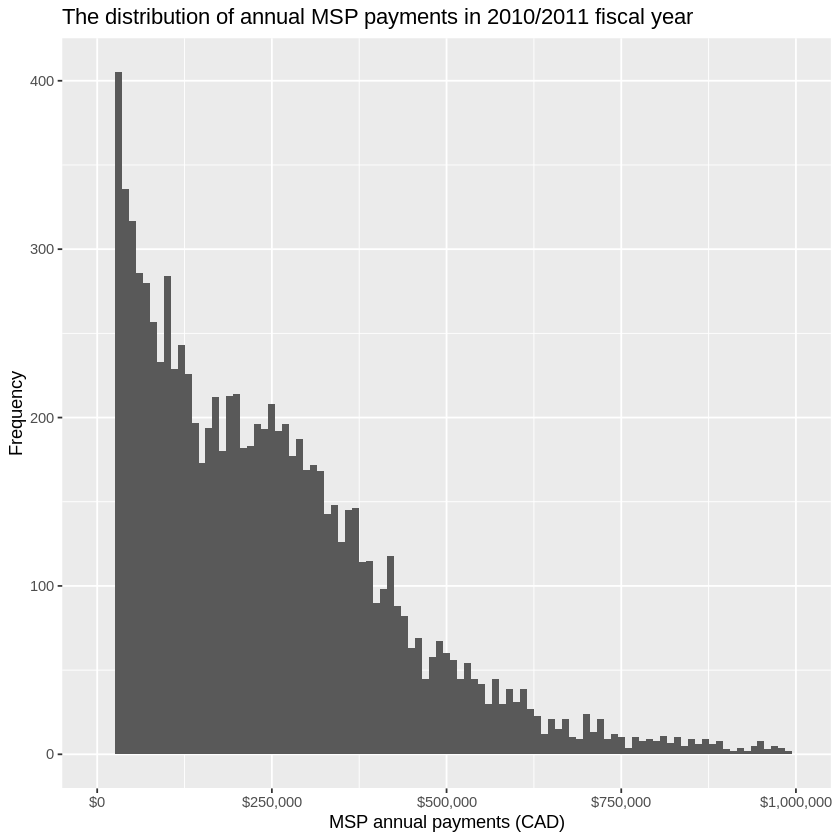

In [22]:
msp_2010_plot <- msp_2010 %>%
ggplot(aes(x = Amount)) + 
    geom_histogram(binwidth = 10000) +
    labs(x = "MSP annual payments (CAD)", y = "Frequency") +
    ggtitle("The distribution of annual MSP payments in 2010/2011 fiscal year") +
    scale_x_continuous(labels = scales::dollar_format(), limits = c(0, 1000000)) 
msp_2010_plot

> Figure 1: Population distribution of 2010/2011

Warning message:
“Removed 261 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


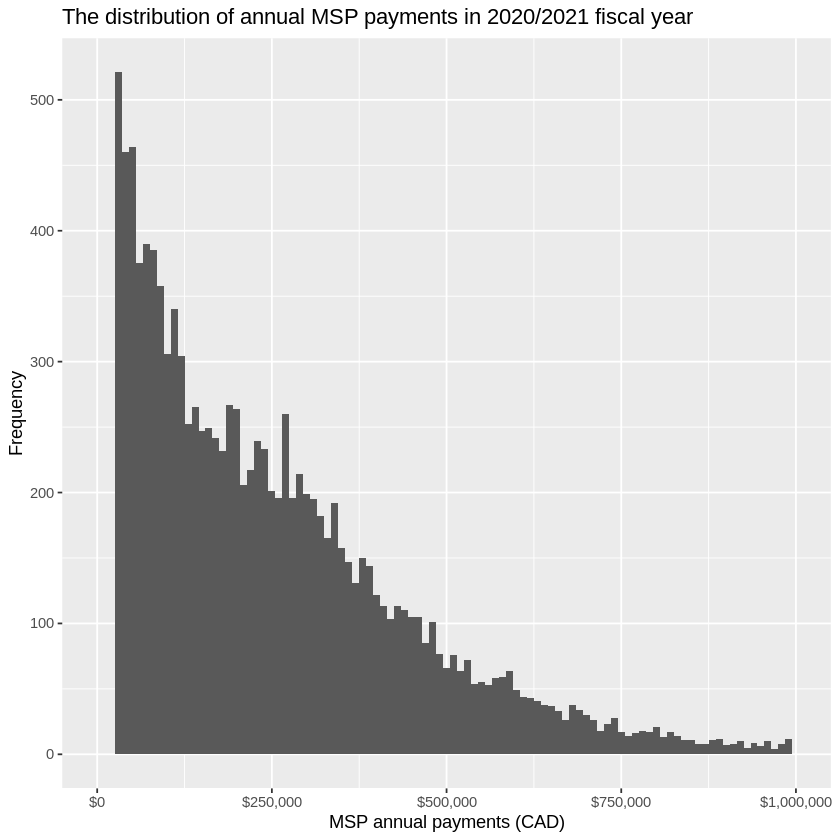

In [23]:
msp_2020_plot <- msp_2020 %>%
ggplot(aes(x = Amount)) + 
    geom_histogram(binwidth = 10000) +
    labs(x = "MSP annual payments (CAD)", y = "Frequency") +
    ggtitle("The distribution of annual MSP payments in 2020/2021 fiscal year") +
    scale_x_continuous(labels = scales::dollar_format(), limits = c(0, 1000000)) 
msp_2020_plot

> Figure 2: Population distribution of 2020/2021

To get a better idea of the data, we use `summary()` to get some statistics about these two subsets and and the `median` value to the plots we create above.

In [24]:
summary_2010 <- summary(msp_2010$Amount)
summary_2010

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    25025    103890    219770    372321    353332 176040137 

In [25]:
summary_2020 <- summary(msp_2020$Amount)
summary_2020

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    25001     98430    215331    420740    370412 273985446 

### Feedback From Instructor and Peer Reviews
According to the feedback from instructor Anthony Obrzut and student Chris Yiu, we realized our data is skewed and contains a lot of outliers. We adapted the suggestions and decided to calculate median, instead of mean, as the population parameter. Additionally, based on the feedback from Anthony Obrzut, we added the limitation of previous researches to the "Introduction" part.

We deeply appreciated the feedback!

### Expected Outcomes
We will compare the bootstrapping and asymptotic method (Central Limit Theorem) using the data from fiscal year 2010/2011. 
We also want to find out whether the MSP payments to practitioners has changed from 2010/2011 to 2020/2021 by conducting a two-sided hypothesis test. 

### Impact of Findings
We will find out whether the medical practitioners received more or less money from the MSP program. Do they get more paid or less paid from the MSP program during the pandemic? 

### Future Questions
Information from the dataset is quite limited, only with names, payments, and time. Hence, we cannot make further analysis regarding other factors, for example, ages, genders, areas of expertise, etc. 


### Comparing Asymptotic Method and Bootstrapping

Now, we will evaluate the asymptotic method (Central Limit Theorem) and the bootstrapping method to decide which one we are going to adapt in the following steps of our project.

In [26]:
length(msp_2010$Amount) # this gives the population size
pop_median <- median(msp_2010$Amount) # population median

[1] 9472

* We will use the data from 2010/2011 for simplicity.
* Since the population is skewed, we will use median as our parameter.
* The population size is 9472. In order to use Central Limit Theorem, the sample size will be approximately 10% of the population, which is 1000. For simplicity and uniformity, all samples in this study will have size 1000.
* We will construct the 90% confidence intervals of estimated population medians for each method. Then we will calculate the confidence interval capture rates of the true population median for asymptotic method and bootstrapping. By comparing two capture rates, we can figure out which method is better. 

#### Asymptotic Method: Central Limit Theorem

By looking at the population histograms above, it's clear that the population distribution is skewed, but the sampling distribution of medians will be theoretically normal according to Central Limit Theorem.

Since the sample size is approximately 10% of the population and all samples are taken in an independent and random fashion. We are able to apply Central Limit Theorem.

In [27]:
set.seed(666)

#We take 1000 simple random sample from the population
samples_msp_2010 <- 
    msp_2010 %>% 
    rep_sample_n(size = 1000, reps = 1000, replace = FALSE)

In [28]:
#Summarize the information of samples:
samples_summary_2010 <-
    samples_msp_2010 %>% 
    group_by(replicate) %>% 
    summarise(sample_median = median(Amount),
              sample_sd = sd(Amount),
              lower_bound = sample_median-qnorm(0.95,lower.tail = TRUE)*sample_sd/sqrt(1000),
              upper_bound = sample_median+qnorm(0.95,lower.tail = TRUE)*sample_sd/sqrt(1000),
              captured = (lower_bound <= pop_median & pop_median <= upper_bound), `.groups` = "drop")
head(samples_summary_2010)

# calculate the proportion of coverage (CLT)
mean(samples_summary_2010$captured)


replicate,sample_median,sample_sd,lower_bound,upper_bound,captured
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,219769.4,340203.5,202073.81,237465.1,TRUE
2,212649.6,1252444.4,147503.94,277795.3,TRUE
3,222099.5,6336124.0,-107472.93,551672.0,TRUE
4,222591.6,530284.4,195008.97,250174.3,TRUE
5,218753.8,5584743.5,-71735.74,509243.3,TRUE
6,213494.1,1320137.5,144827.35,282160.8,TRUE


[1] 0.997

> Table 4: Summary of data from 2010/2011 (CLT)

We summarized the information of the sample. We obtained the following statistics:
- sample median: sample_median
- sample standard deviation: sample_sd
- lower bound of confidence interval: lower_bound
- upper bound of confidence interval: upper_bound
- whether the confidence interval captured the true value: captured
The result shows that the proportion of capture rate using CLT is 99.7%.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



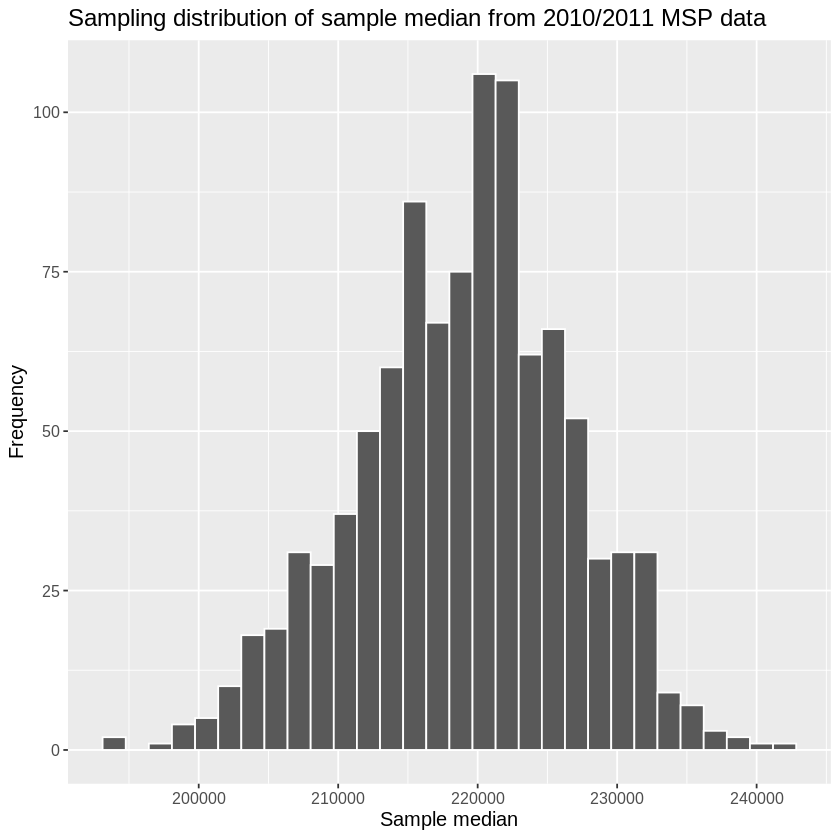

In [29]:
#visualize the sampling distribution of median 
sampling_dist_msp_median_2010 <-
    samples_summary_2010 %>% 
    ggplot() + 
    geom_histogram(aes(x = sample_median), color="white") +
    theme(text = element_text(size = 12))+
    xlab("Sample median") +
    ylab("Frequency") +
    ggtitle("Sampling distribution of sample median from 2010/2011 MSP data") 
sampling_dist_msp_median_2010

> Figure 3: Sampling distribution of 2010/2011

We visualized the sampling distribution of median. The Central Limit Theorem implies that if we are summing up a very large number of random terms, the distribution of this sum is approximately Normal. In this case, CLT is applicable in our study. Using a sample size large enough, it shows that the sampling distribution of the sample will be approximately normal, regardless of the population distribution.

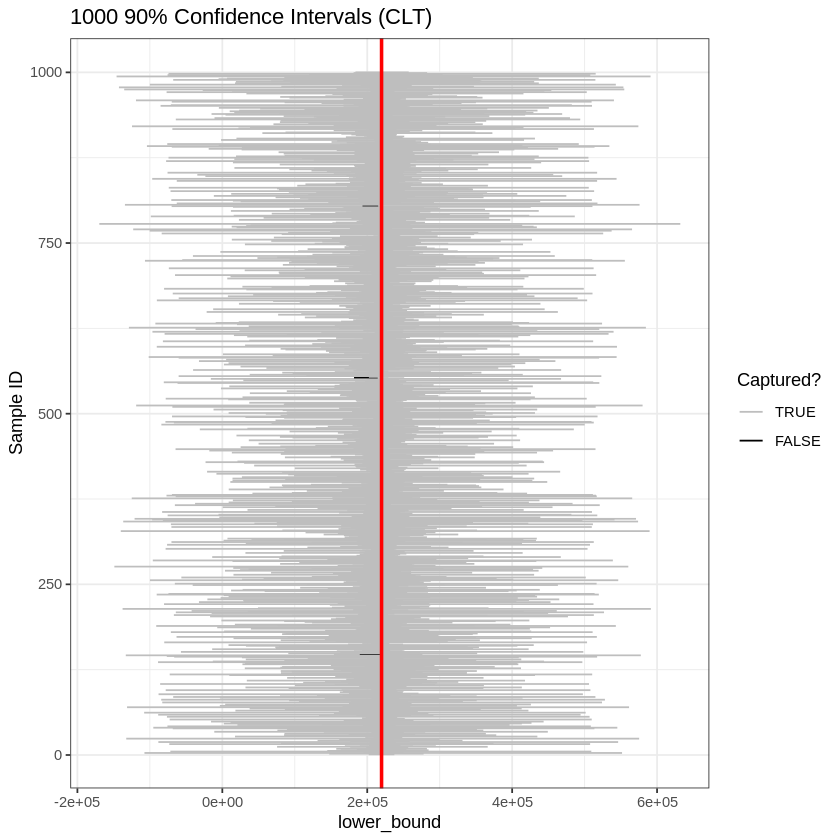

In [30]:
#visualize the coverage of confidence interval (CLT)
many_ci_plot_clt <- 
    samples_summary_2010 %>%
    ggplot() +
    scale_colour_manual(breaks = c("TRUE", "FALSE"), 
                        values = c("grey", "black")) +
    geom_segment(aes(x = lower_bound,
                     xend = upper_bound,
                     y = replicate,
                     yend = replicate,
                     colour = captured)) +
    geom_vline(xintercept = pop_median, colour = "red", size = 1) +
    labs(title = "1000 90% Confidence Intervals (CLT)",
         x = "Median of msp payments",
         y = "Sample ID",
         colour = "Captured?") +
    theme_bw() 
many_ci_plot_clt

> Figure 4: 1000 percentile-based 90% confidence intervals for median (CLT)

According to `Figure 4`, we know that almost all of the intervals capture the true population median, which indicates that the Central Limit Theorem is a reasonable method.

#### Bootstrapping

In this section, we will perform bootstrapping to estimate the population median. By definition, we first take a simple random sample of size 1000 from the population, and then take 1000 bootstrap samples by sampling with replacement. After that, we will calculate the sample median and then construct the confidence intervals for all bootstrap samples. Same as the CLT section, we will calculate the capture rate of the true population median.


In [31]:
set.seed(666)

## take one sample from population 
msp_2010_sample <- msp_2010 %>%
rep_sample_n(size = 1000, replace = FALSE)

## find the sample's bootstrap
msp_2010_bootstrap <- msp_2010_sample %>%
rep_sample_n (size = 1000, reps = 1000, replace = TRUE) 

#summarize the bootstrap samples information
bootstrap_samples_summary <- 
    msp_2010_bootstrap %>% 
    group_by (replicate) %>%
    summarize(bootstrap_median= median (Amount),
              bootstrap_sd = sd(Amount),
              ci_lower = bootstrap_median - qnorm(0.95,lower.tail = TRUE)*bootstrap_sd/sqrt(1000),
              ci_upper = bootstrap_median + qnorm(0.95,lower.tail = TRUE)*bootstrap_sd/sqrt(1000),
             captured = (ci_lower <= pop_median & pop_median <= ci_upper))

head(bootstrap_samples_summary)

#calculate the proportion of coverage
mean(bootstrap_samples_summary$captured)

replicate,bootstrap_median,bootstrap_sd,ci_lower,ci_upper,captured
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,213591.9,211504.6,202590.6,224593.3,TRUE
2,222325.1,339139.8,204684.8,239965.4,TRUE
3,211646.0,407191.3,190466.0,232826.0,TRUE
4,225719.4,466044.4,201478.2,249960.7,TRUE
5,205450.1,234122.2,193272.2,217627.9,FALSE
6,227333.0,455357.4,203647.7,251018.3,TRUE


[1] 0.944

> Table 5: Summary of data from 2010/2011 (bootstrapping)

We summarized the information of the sample. We obtained the following statistics:
- sample median: bootstrap_median
- sample standard deviation: bootstrap_sd
- lower bound of confidence interval: ci_lower
- upper bound of confidence interval: ci_upper
- whether the confidence interval captured the true value: captured


The result shows that the proportion of capture rate using Bootstrapping is 94.4%.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



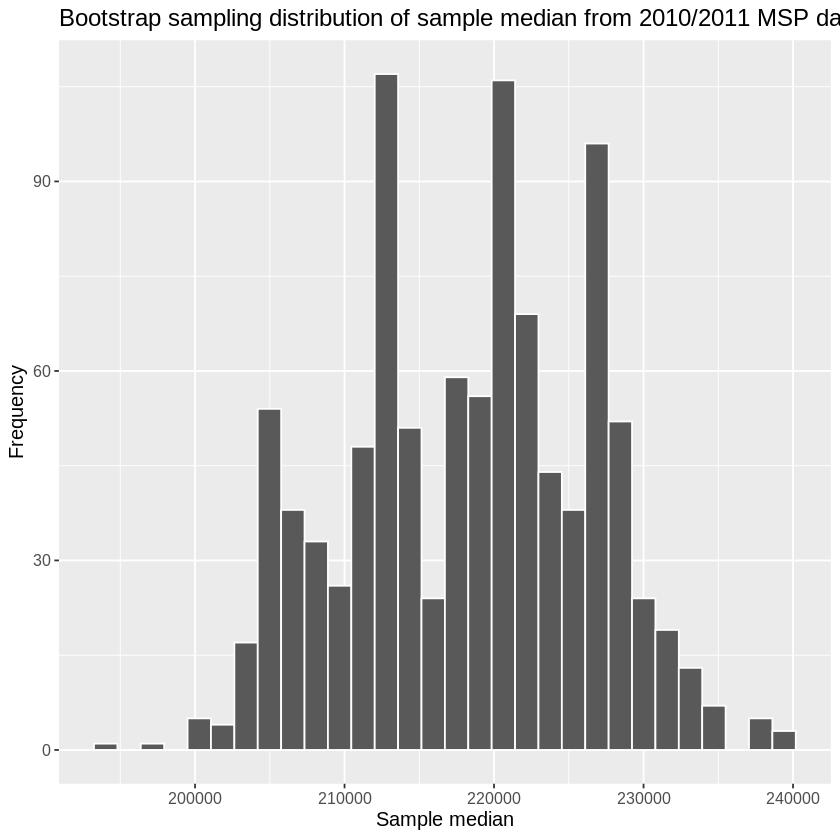

In [32]:
#visualize the distribution of the means of bootstrap samples

bootstrap_sample_dist_msp_median_2010 <-
    bootstrap_samples_summary %>% 
    ggplot() + 
    geom_histogram(aes(x = bootstrap_median), color="white") +
    theme(text = element_text(size = 12))+
    xlab("Sample median") +
    ylab("Frequency") +
    ggtitle("Bootstrap sampling distribution of sample median from 2010/2011 MSP data") 
bootstrap_sample_dist_msp_median_2010

> Figure 5: Bootstrap sampling distribution of 2010/2011

Above is the distribution of medians of bootstrap samples. The mean of medians is centered, but it does not have a smooth bell shape. It is because of the randomness when picking the simple random sample from population.

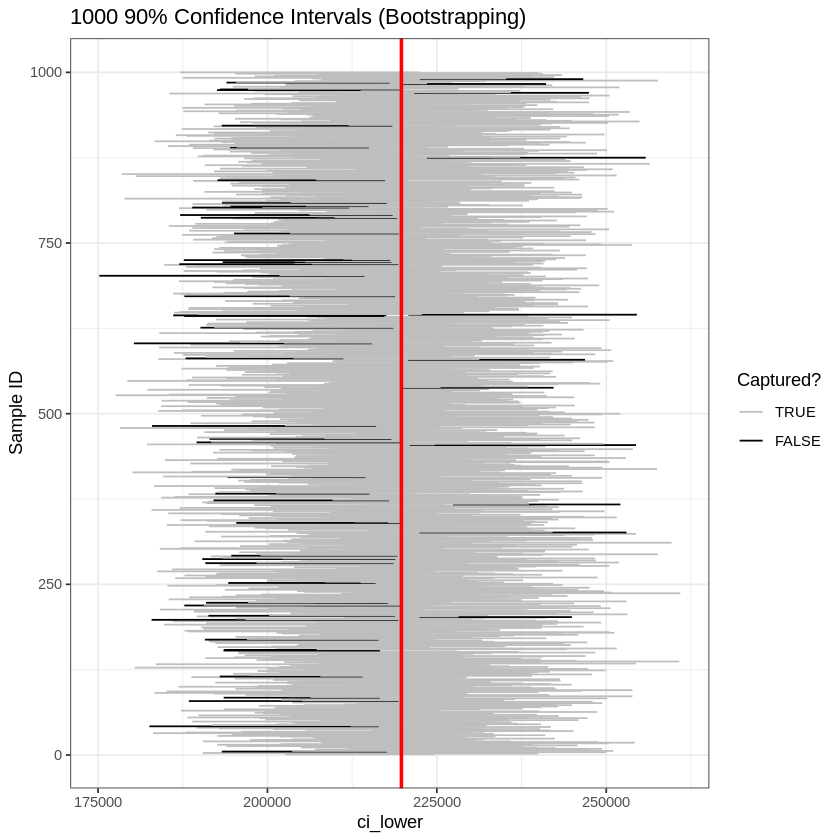

In [33]:
#visualize the coverage of confidence interval (Bootstrapping)

many_ci_plot_bootstrap <- 
    bootstrap_samples_summary %>%
    ggplot() +
    scale_colour_manual(breaks = c("TRUE", "FALSE"), 
                        values = c("grey", "black")) +
    geom_segment(aes(x = ci_lower,
                     xend = ci_upper,
                     y = replicate,
                     yend = replicate,
                     colour = captured)) +
    geom_vline(xintercept = pop_median, colour = "red", size = 1) +
    labs(title = "1000 90% Confidence Intervals (Bootstrapping)",
         y = "Sample ID",
         colour = "Captured?") +
    theme_bw() 
many_ci_plot_bootstrap

> Figure 6: 1000 percentile-based 90% confidence intervals for median (bootstrapping)

According to `Figure 6`, most of the lines are gray, which implies that most of the confidence intervals captured the true median. So the bootstrapping method is a reasonable choice.

### Hypothesis Test
* H0: the median of 2010/2011 msp amounts is the same as the median of 2020/2021 msp amounts
* HA: the median of 2010/2011 msp amounts is different from the median of 2020/2021 msp amounts
* We use alpha = 0.1 (90% confidence interval)
* Estimate the population parameters by bootstrapping, and then construct 90% confidence intervals respectively. Finally, we will see whether two confidence intervals overlap.
* Note: After the comparison between CLT and bootstrapping, we decide to use bootstrapping since both methods are similarly accurate (high capture rates). But in reality, it is unrealistic to construct the actual sampling distribution. It is more common to use bootstrapping.

In [36]:
set.seed(666)

#2010
## We obtained the single random sample "msp_2010_sample" from the "Bootstrapping" session
## find the sample's bootstrap
msp_2010_bootstrap_samples <- msp_2010_sample %>%
rep_sample_n (size = 1000, reps = 1000, replace = TRUE) %>%
group_by(replicate)%>%
summarize(sample_median = median(Amount),Fiscal_Year = "2010/2011")

#2020
## take one sample from population   
msp_2020_sample <- msp_2020 %>%
rep_sample_n(size = 1000, replace = FALSE)

## find the sample's bootstrap
msp_2020_bootstrap_samples <- msp_2020_sample %>%
rep_sample_n (size = 1000, reps = 1000, replace = TRUE) %>%
group_by(replicate)%>%
summarize(sample_median = median(Amount),Fiscal_Year = "2020/2021")

#summarize the bootstrap samples, we want to compare the coverage of two confidence intervals
msp_2010_summary <- msp_2010_bootstrap_samples%>%
                group_by(Fiscal_Year) %>%
                summarise(mean= mean(sample_median),
                          sd = sd(sample_median),
                         n = n(),
                         upper = mean+qnorm(0.95)*sd/sqrt(n),
                         lower = mean-qnorm(0.95)*sd/sqrt(n))

msp_2020_summary <- msp_2020_bootstrap_samples%>%
                group_by(Fiscal_Year) %>%
                summarise(mean= mean(sample_median),
                          sd = sd(sample_median),
                         n = n(),
                         upper = mean+qnorm(0.95)*sd/sqrt(n),
                         lower = mean-qnorm(0.95)*sd/sqrt(n))

msp_2010_summary

Fiscal_Year,mean,sd,n,upper,lower
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
2010/2011,218309.1,8251.955,1000,218738.3,217879.8


> Table 6: Summary of bootstrap samples from 2010/2011 data

In [37]:
msp_2020_summary

Fiscal_Year,mean,sd,n,upper,lower
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
2020/2021,208488.1,10551.59,1000,209037,207939.3


> Table 7: Summary of bootstrap samples from 2020/2021 data

Summary of 2010/2011 and 2020/2022 bootstrap samples:
- Mean of medians: mean
- Standard deviation of medians: sd
- Bootstrap size: n
- Upper bound of 90% CI: upper
- Lower bound of 90% CI: lower

Hence, we extract the following information for comparison:
- 90% confidence interval for 2010/2011: (217879.8, 218738.3) from `Table 6`
- 90% confidence interval for 2020/2021: (207939.3, 209037) from `Table 7`

Two intervals are very close but they do not overlap.

## Discussion

In this project, firstly, on the premise that the medical recourse is highly valued in our society, we chose to study the data of MSP payments to practitioners and organizations for the recent 10 years. In order to make our study more concise and intuitive, we picked the data from 2010/2011 and 2020/2021 to conduct the research. Since the data came from the census, it was reasonable to consider the dataset is the population.

Secondly, we discovered that the data set is already in a tidy format. But when we plotted the data using histograms, we found that the populations are heavily right-skewed. Hence, we decided to use the median, rather than the mean, to summarize the data. Because compared to the mean, the median is more robust to outliers.

Thirdly, we compared the asymptotic method (Central Limit Theorem) and bootstrapping by calculating the confidence interval capture rate. Both methods had high capture rates, between 90% to 100%. So we can conclude that both methods are appropriate. But the capture rate of the asymptotic method was slightly higher than the capture rate of bootstrapping. Yet, we cannot conclude that CLT is strictly better than bootstrapping because the difference was quite small, and the performance of bootstrapping can be affected by the randomness of the simple random sample from the population.

Finally, after proposing the H0 and HA of our hypothesis test, we generated 1000 samples and calculated their medians and their 90% confidence intervals. After that, we calculated the means of sample medians, 218309.1 for 2010/2011 data and 208488.1 for 2020/2021 data. Then, we constructed 90% confidence intervals, [217879.8,218738.3] for 2010/2011 data and [207939.3,209037] for 2020/2021 data. Therefore, we rejected H0 since these two confidence intervals did not overlap. 

The outcomes were as expected since we thought there might be a difference in MSP payments due to the scale of the pandemic as well as many other confounding factors, like policies or the fiscal situation of the BC government. This study can lead to future research on identifying the factors such as the number of patients for each doctor, gender, educational level, etc. However, maybe due to the privacy concern, the official site provided limited information to the public.

## References

Barer, M. L., Pulcins, I. R., Evans, R. G., Hertzman, C., Lomas, J., & Anderson, G. M. (1989). Trends in use of medical services by the elderly in British Columbia. CMAJ: Canadian Medical Association Journal, 141(1), 39.
Compensation Policy and Programs. (2022, February 8). MSP Blue Book . Retrieved February 21, 2022, from https://catalogue.data.gov.bc.ca/dataset/c7413d9f-112e-4a26-bbd1-ae2711856629.

G, K., Steinmetz, S., & de Vries, D. H. (2014, April 23). Should I stay or should I go? The impact of working time and wages on retention in the health workforce - Human Resources for Health. Human Resources for Health. Retrieved March 5, 2022, from https://human-resources-health.biomedcentral.com/articles/10.1186/1478-4491-12-23

Ministry of Health. (2021, July 29). Medical services plan. Province of British Columbia. Retrieved February 22, 2022, from https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp

Wranik, D. W., & Durier-Copp, M. (2010). Physician remuneration methods for family physicians in Canada: expected outcomes and lessons learned. Health Care Analysis, 18(1), 35-59.